In [519]:
# Install rdkit
!pip install rdkit-pypi

In [520]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles, SDMolSupplier, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.DataStructs import DiceSimilarity
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



1. Create the paracetamol molecule


In [521]:
paracetamol = MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O')

2. Visualize the molecule

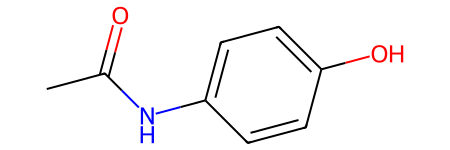

In [522]:
paracetamol

3. Number of atoms in the molecule


In [523]:
print("Number of atoms: ",paracetamol.GetNumAtoms())

Number of atoms:  11


4. List of paracetamol molecule atoms


In [524]:
print([atom.GetSymbol() for atom in paracetamol.GetAtoms()])

['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'O']


La méthode `GetNumAtoms` nous donne 11 atomes, on peut supposer qu'elle ne comptabilise pas les atomes d'hydrogène, ce qui est confirmé quand on affiche la liste des atomes renvoyés pr la méthode `GetAtoms` qui ne contient pas les atomes d'hydrogène.

5. Number of bonds in the molecule

In [525]:
print("There are " + str(paracetamol.GetNumBonds()) + " bonds in the molecule")

There are 11 bonds in the molecule


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".

1. Download this file and save it in a folder.

In [526]:
# dowlnoad the sdf file and save it into a folder named data
! [ -e "DB00295.sdf" ] || wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf -P data

--2023-09-24 15:31:03--  https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
Résolution de go.drugbank.com (go.drugbank.com)… 172.66.41.6, 172.66.42.250
Connexion à go.drugbank.com (go.drugbank.com)|172.66.41.6|:443… connecté.
requête HTTP transmise, en attente de la réponse… 

200 OK
Taille : non indiqué [text/plain]
Sauvegarde en : « data/DB00295.sdf.1 »

DB00295.sdf.1           [ <=>                ]   7,38K  --.-KB/s    ds 0s      

2023-09-24 15:31:03 (79,2 MB/s) - « data/DB00295.sdf.1 » sauvegardé [7559]



2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"

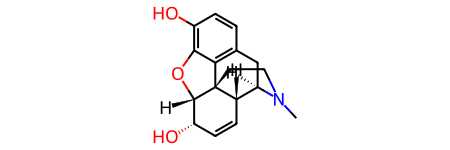

In [527]:
morphine = Chem.SDMolSupplier('data/DB00295.sdf')[0]
morphine

3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [528]:
fp = GetMorganFingerprintAsBitVect(morphine, 2, nBits=1024)
bit_string = fp.ToBitString()

print("The length of the bit string is: ", len(bit_string))

print("The bit string is: ", bit_string)

The length of the bit string is:  1024
The bit string is:  00000000000000010000000000000000010010000000000000000000000100000001000000000100000000000000000000000000000000000000000001000000000000000010000000010010000000000000000000000000000000000000000000000000000000000001100000000000000000010100000000000000000000000000000000000010000000000000000000000000100000000000000100000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000010000100000000000000000000000000000000000001000010000000000000000000000000000010000000000100000000000000000000000000000000000100000000000000000000100000000000000100000000101001000000000000001000000000000000000000000000000000000000000000000100000000100000000100000000000000000000000000000000000000010000000000000000000010000000000000000000000010000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000010000000000000000000000010000000000000000000000000000000000000000000000000000100000000100001

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.

1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is "CC(=O)NC1=CC=C(O)C=C1". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

In [529]:
def find_nonzero_elements(molecule):
    fp = np.array(AllChem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024))
    return np.nonzero(fp)

In [530]:
find_nonzero_elements(paracetamol)

(array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
         745,  754,  792,  807,  843,  849,  893, 1017]),)


2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)OC1=CC=CC=C1C(O)=O".


In [531]:
aspirin = MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
find_nonzero_elements(aspirin)

(array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
         592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
         967, 1017]),)


3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [532]:
similarity = DataStructs.DiceSimilarity(GetMorganFingerprintAsBitVect(paracetamol, 2, nBits=1024), GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024))
print("Similarity between paracetamol and aspirin is: ", similarity)

Similarity between paracetamol and aspirin is:  0.37209302325581395


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [533]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList]
    
values = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

descriptors = values.CalcDescriptors(paracetamol)

for name, value in zip(descriptor_names, descriptors):
    print(f"{name}: {value}")


MaxEStateIndex: 10.524468537414966
MinEStateIndex: -0.11510204081632636
MaxAbsEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
qed: 0.5950261967780849
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964742
BCUT2D_CHGHI: 1.9280360590359853
BCUT2D_CHGLO: -1.9945540738765883
BCUT2D_LOGPHI: 2.125247579160178
BCUT2D_LOGPLOW: -2.0440113126102912
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266072
BalabanJ: 2.7362980721056545
BertzCT: 253.29949758389105
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1: 5.1815405503520555
Chi1n: 3.2490981480278296


## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).

2. Highlight the pattern "CCC" in these molecules.




Molecules that contain the pattern:
CCCCC


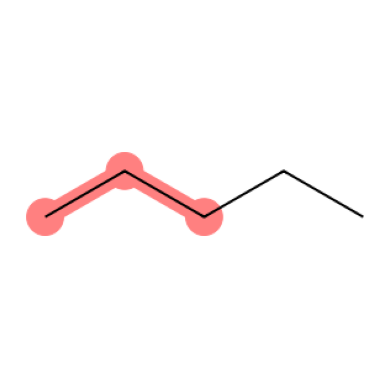

In [534]:
smiles_list = ["CCCCC", "CCOCC", "CCNCC", "CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

pattern = Chem.MolFromSmarts("CCC")

def find_and_highlight_matching_molecules(smiles_list, pattern):
    if pattern is None:
        raise ValueError(f"Invalid pattern: {pattern}")
    
    matching_molecules = []
    for molecule in smiles_list:
        mol = Chem.MolFromSmiles(molecule)  
        if mol and mol.GetSubstructMatch(pattern):
            matching_molecules.append(mol)
    
    if matching_molecules:
        print("Molecules that contain the pattern:")
        for mol in matching_molecules:
            print(Chem.MolToSmiles(mol))
            match = mol.GetSubstructMatch(pattern)
            
            highlight_atoms = list(match)
            highlight_bonds = set()
            for i in range(len(match)):
                for j in range(i + 1, len(match)):
                    bond = mol.GetBondBetweenAtoms(match[i], match[j])
                    if bond is not None:
                        highlight_bonds.add(bond.GetIdx())
            
            img = Draw.MolToImage(mol, highlightAtoms=highlight_atoms, highlightBonds=highlight_bonds, size=(300, 300))
            
            plt.imshow(img)
            plt.axis('off')
            plt.show()
    else:
        print("No molecules match the pattern in the provided list.")


try:
    find_and_highlight_matching_molecules(smiles_list, pattern)
except ValueError as ve:
    print(ve)



3. Do the same thing ex 1 but for the pattern "C(=O)N".

Molecules that contain the pattern:
CC(=O)Nc1ccc(O)cc1


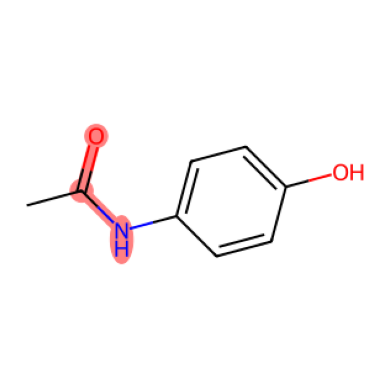

CC(=O)Nc1ccc(O[13CH3])cc1


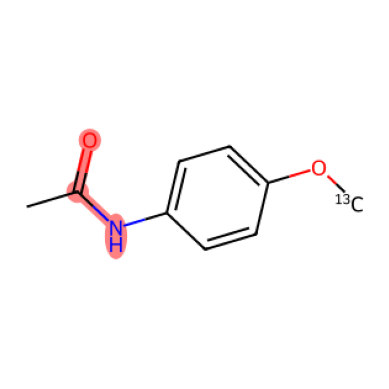

CN(C(=O)C(Cl)Cl)c1ccc(O)cc1


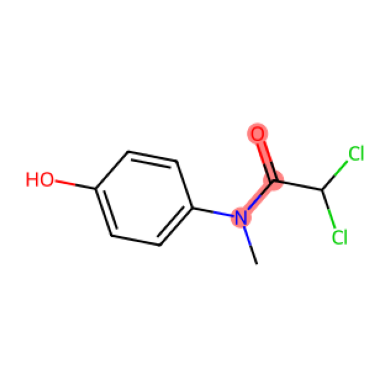

In [535]:
pattern = Chem.MolFromSmarts("C(=O)N")

try:
    find_and_highlight_matching_molecules(smiles_list, pattern)
except ValueError as ve:
    print(ve)

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:




1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


In [536]:
![ -e "solubility.train.sdf" ] || wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf -P data

--2023-09-24 15:31:04--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443… connecté.
requête HTTP transmise, en attente de la réponse… 

200 OK
Taille : 1376487 (1,3M) [text/plain]
Sauvegarde en : « data/solubility.train.sdf.1 »

solubility.train.sd 100%[===================>]   1,31M  --.-KB/s    ds 0,05s   

2023-09-24 15:31:04 (24,9 MB/s) — « data/solubility.train.sdf.1 » sauvegardé [1376487/1376487]



2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.

In [537]:
molecule_list = Chem.SDMolSupplier('data/solubility.train.sdf', removeHs=False)
print("Number of molecules in the list: ", len(molecule_list))

Number of molecules in the list:  1025


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.

In [538]:
def calculate_descriptors(mol):
    descriptor_names = [desc_name[0] for desc_name in Descriptors._descList]
    values = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = values.CalcDescriptors(mol)
    return np.array(descriptors)

4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


In [539]:
index_names = [mol.GetProp("NAME") for mol in molecule_list]
df = pd.DataFrame([calculate_descriptors(mol) for mol in molecule_list], index=index_names, columns=descriptor_names)

df.head()


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
n-pentane,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cyclopentane,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n-hexane,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2-methylpentane,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2,2-dimethylbutane",2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


In [540]:
labels = [float(mol.GetProp('SOL')) for mol in molecule_list]
labels[:10]

[-3.18, -2.64, -3.84, -3.74, -3.55, -3.1, -3.3, -4.53, -3.85, -5.24]

6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?

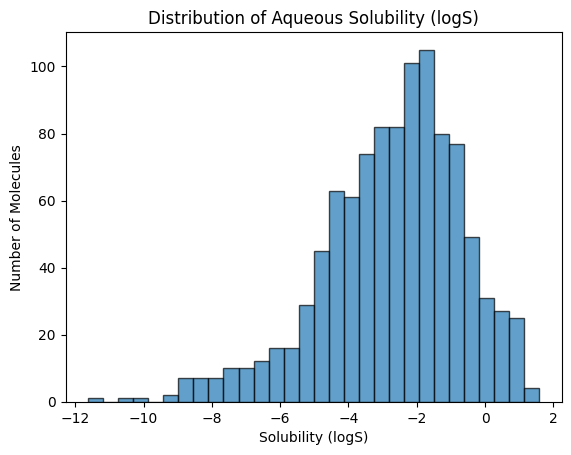

In [541]:
plt.hist(labels, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Aqueous Solubility (logS)')
plt.xlabel('Solubility (logS)')
plt.ylabel('Number of Molecules')
plt.show()


La distribution suivante suggère que la plupart des molécules sont peu solubles dans l'eau car l'histogramme est centré autour de -2.

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.

In [542]:
df['labels'] = labels
df.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,labels
n-pentane,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.18
cyclopentane,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.64
n-hexane,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-3.84
2-methylpentane,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.74
"2,2-dimethylbutane",2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.55


In [543]:
df.isna().any().any()

True

In [544]:
nan_count_total = df.isna().sum().sum()
print("Number of NaN values in the dataframe: ", nan_count_total)

Number of NaN values in the dataframe:  12


In [545]:
df.dropna(inplace=True)

2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.

In [546]:
scaler = MinMaxScaler()
X = df.drop(columns=['labels'])
Y = df['labels']
scaled_X = scaler.fit_transform(X)

3. Construct and train a regression model.

In [547]:
model = LinearRegression()
model.fit(scaled_X, Y)
y_pred = model.predict(scaled_X)

4. Calculate the square root error for the dataset

In [548]:
rmse = np.sqrt(mean_squared_error(Y, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.5014151281235503


## Ex6.III Prepare data for test  and test model

Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

In [549]:
! [ -e "data/solubility.test.sdf" ] || wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf -P data


2. Read molecules from this file and store them in a list named **list_molecule_test**.

In [550]:
list_molecule_test = Chem.SDMolSupplier('data/solubility.test.sdf', removeHs=False)
print("Number of molecules in the list: ", len(list_molecule_test))

Number of molecules in the list:  257


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.

In [551]:
descriptors = calculate_descriptors(list_molecule_test[0])

4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.




In [552]:
descriptors_df = pd.DataFrame(descriptors.reshape(1, -1), columns=X.columns)
scaled_descriptors = scaler.transform(descriptors_df)

5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.


In [553]:
Y_test_mol = model.predict(scaled_descriptors)
Y_pred_mol = list_molecule_test[0].GetProp('SOL')
print(f"Predicted aqueous solubility (logS): {Y_test_mol[0]:.2f} vs. True value: {Y_pred_mol}")

Predicted aqueous solubility (logS): -3.39 vs. True value: -3.68
